# Raio-X da Politica de Ibicarai

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import io
import collections
sns.set_style('darkgrid')

%matplotlib inline

### Candidatos de Ibicarai

In [2]:
cand = pd.read_csv('consulta_cand_2020_BA.csv', encoding='latin', sep=';')

can = cand[['NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'DS_ELEICAO', 'DT_ELEICAO', 
            'SG_UF', 'NM_UE', 'DS_CARGO', 'SG_PARTIDO', 'NM_MUNICIPIO_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
     'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO']]

cand_ibi = can[can['NM_UE'].isin(['IBICARAÍ'])]

In [3]:
cand_ibi = cand_ibi.rename(columns={'NR_CANDIDATO':'numero', 'NM_CANDIDATO':'nome', 'NM_URNA_CANDIDATO':'nome_urna', 
                         'DS_CARGO':'cargo', 'SG_PARTIDO':'partido', 'NM_MUNICIPIO_NASCIMENTO':'cidade_nascimento',
                         'NR_IDADE_DATA_POSSE':'idade_na_posse', 'DS_GENERO':'sexo', 'DS_GRAU_INSTRUCAO':'grau_instrucao',
                         'DS_ESTADO_CIVIL':'estado_civil', 'DS_COR_RACA':'cor_raca', 'DS_OCUPACAO':'ocupacao'
                        })

cand_ibi.drop(columns=['DS_ELEICAO', 'DT_ELEICAO', 'SG_UF', 'NM_UE'], inplace=True)

#### Sobrenomes dos Candidatos

In [4]:
lista_nome = []
for nome in cand_ibi['nome'].values:
    x = nome.split()[1:]
    lista_nome.extend(x)

In [5]:
dict_nome = dict(collections.Counter(lista_nome))

s = pd.Series(dict_nome, index=dict_nome.keys())
del s['DE']
del s['DOS']
del s['DA']
del s['MARIA']

In [6]:
s.nlargest(15)

SANTOS        35
SILVA         27
OLIVEIRA      20
ALVES         13
SOUZA         10
COSTA          9
SOARES         7
NETO           7
NASCIMENTO     7
SANTANA        6
FERREIRA       6
JESUS          6
PEREIRA        5
ASSIS          5
DIAS           5
dtype: int64

#### Diferenças de Genero

In [7]:
# por grau de instrucao
# 86% das mulheres tem ensino medio completo ou superior completo. Homens ficam em 66%
# 34% tem ensino superior completo. Enquanto os homens sao 18%
cand_ibi.groupby('sexo')['grau_instrucao'].value_counts()

sexo       grau_instrucao               
FEMININO   ENSINO MÉDIO COMPLETO            28
           SUPERIOR COMPLETO                18
           SUPERIOR INCOMPLETO               3
           ENSINO FUNDAMENTAL INCOMPLETO     2
           ENSINO FUNDAMENTAL COMPLETO       1
           ENSINO MÉDIO INCOMPLETO           1
MASCULINO  ENSINO MÉDIO COMPLETO            48
           SUPERIOR COMPLETO                19
           ENSINO FUNDAMENTAL COMPLETO      15
           ENSINO FUNDAMENTAL INCOMPLETO    10
           ENSINO MÉDIO INCOMPLETO           5
           SUPERIOR INCOMPLETO               4
Name: grau_instrucao, dtype: int64

In [34]:
cand_ibi.groupby('sexo')['ocupacao'].value_counts()

sexo       ocupacao                                                              
FEMININO   OUTROS                                                                    19
           COMERCIANTE                                                                5
           SERVIDOR PÚBLICO MUNICIPAL                                                 5
           TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO ENFERMEIRO)                   3
           DONA DE CASA                                                               2
           ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS                             2
           PROFESSOR DE ENSINO FUNDAMENTAL                                            2
           RECEPCIONISTA                                                              2
           VEREADOR                                                                   2
           AGENTE ADMINISTRATIVO                                                      1
           COMERCIÁRIO                

In [41]:
cand_ibi.groupby('sexo')['idade_na_posse'].value_counts().nlargest(3)

sexo       idade_na_posse
MASCULINO  50                8
           42                5
           49                5
Name: idade_na_posse, dtype: int64

In [33]:
cand_ibi['sexo'].value_counts()

MASCULINO    101
FEMININO      53
Name: sexo, dtype: int64

#### Ocupação

In [25]:
cand_ibi.loc[cand_ibi['cargo'].str.contains('PREFEITO'), 'nome':'ocupacao']

,nome,nome_urna,cargo,partido,cidade_nascimento,idade_na_posse,sexo,grau_instrucao,estado_civil,cor_raca,ocupacao
7229,MONALISA GONCALVES TAVARES,DRA MONALISA,PREFEITO,DEM,ITABUNA,53,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,MÉDICO
10284,FABIANE LYRA DE SOUZA,FABIANE,VICE-PREFEITO,PT,ITABUNA,52,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,EMPRESÁRIO
13981,LEILTON SILVA GUEDES,DINHO GUEDES,VICE-PREFEITO,REPUBLICANOS,IBICARAÍ,62,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,COMERCIANTE
14100,EDENILSON GONÇALVES FERREIRA,TENENTE GONÇALVES,PREFEITO,REPUBLICANOS,IBICARAÍ,60,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,POLICIAL MILITAR
17240,LUIZ JÁCOME BRANDÃO NETO,LULA BRANDÃO,PREFEITO,PSD,ITABUNA,47,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,PREFEITO
21831,GIVANILSON FRANCISCO DOS SANTOS,VAN,VICE-PREFEITO,AVANTE,ITAPETINGA,49,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,COMERCIANTE
29861,LENILDO ALVES SANTANA,LENILDO,PREFEITO,PT,FLORESTA AZUL,53,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,PROFESSOR DE ENSINO MÉDIO
30317,KLAUSS DE OLIVEIRA MARTINS PINHEIRO FARIAS,KLAUSS FARIAS,PREFEITO,PP,ITABUNA,37,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,ADVOGADO
35243,HENRIQUE PIMENTEL SAMPAIO NETO,HENRIQUE SAMPAIO,VICE-PREFEITO,PP,IBICARAÍ,50,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,REPRESENTANTE COMERCIAL
39581,ADELSON OLIVEIRA DOS SANTOS,ADELSON DA BANCA,VICE-PREFEITO,DEM,ITAPITANGA,51,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,EMPRESÁRIO


#### Curiosidade sobre nome na urna

In [32]:
lista_nome_urna = []
for i in cand_ibi['nome_urna'].values:
    x = i.split()
    lista_nome_urna.extend(x)

In [33]:
lista_nome_urna = [x.lower() for x in lista_nome_urna]

In [52]:
s_u = pd.Series(collections.Counter(lista_nome_urna))


da         17
do         15
de          8
adriana     5
alves       4
dtype: int64

In [78]:
s_u.nlargest(15)

adriana       5
alves         4
bela_vista    4
soares        3
eliana        3
saúde         3
filho         3
assis         3
gonçalves     2
antonio       2
pastor        2
profa         2
vila          2
neguinho      2
santana       2
dtype: int64

In [74]:
s_u['bela_vista'] = s_u['bela'] + s_u['vista']
del s_u['bela']
del s_u['vista']

In [106]:
# aqui podemos analisar o grau de instrucao de acordo com a cor declarada de cada 1
cand_ibi[cand_ibi['cor_raca'].str.contains('PRETA')]['grau_instrucao'].value_counts()

ENSINO MÉDIO COMPLETO            11
SUPERIOR COMPLETO                 4
ENSINO FUNDAMENTAL COMPLETO       3
ENSINO FUNDAMENTAL INCOMPLETO     3
ENSINO MÉDIO INCOMPLETO           1
Name: grau_instrucao, dtype: int64

#### Sobre os Partidos

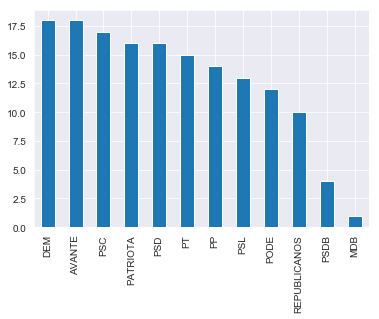

In [331]:
cand_ibi['partido'].value_counts().plot(kind='bar')

In [26]:
cand_ibi[cand_ibi['sexo'] == 'FEMININO']['partido'].value_counts()

PSD             7
AVANTE          6
PSC             6
PATRIOTA        6
DEM             6
PT              5
PSL             4
PODE            4
PP              4
REPUBLICANOS    3
PSDB            2
Name: partido, dtype: int64

In [28]:
cand_ibi.groupby('partido')['sexo'].value_counts()

partido       sexo     
AVANTE        MASCULINO    12
              FEMININO      6
DEM           MASCULINO    12
              FEMININO      6
MDB           MASCULINO     1
PATRIOTA      MASCULINO    10
              FEMININO      6
PODE          MASCULINO     8
              FEMININO      4
PP            MASCULINO    10
              FEMININO      4
PSC           MASCULINO    11
              FEMININO      6
PSD           MASCULINO     9
              FEMININO      7
PSDB          FEMININO      2
              MASCULINO     2
PSL           MASCULINO     9
              FEMININO      4
PT            MASCULINO    10
              FEMININO      5
REPUBLICANOS  MASCULINO     7
              FEMININO      3
Name: sexo, dtype: int64

#### Idade na Posse

In [27]:
cand_ibi[cand_ibi['sexo'] == 'FEMININO']['idade_na_posse'].value_counts().sort_index()

24    1
25    1
26    2
33    1
34    1
36    1
37    2
38    2
39    1
40    3
41    2
42    4
43    2
44    1
45    2
46    3
47    2
48    1
49    1
50    1
51    2
52    3
53    2
54    2
55    2
57    3
60    1
61    1
64    2
65    1
Name: idade_na_posse, dtype: int64

In [84]:
cand_ibi['idade_na_posse'].value_counts().sort_index()

22    1
24    2
25    2
26    3
27    2
28    3
29    1
30    2
33    4
34    4
35    2
36    4
37    5
38    4
39    2
40    5
41    3
42    9
43    6
44    5
45    2
46    6
47    5
48    3
49    6
50    9
51    4
52    8
53    5
54    2
55    4
56    1
57    3
58    3
59    3
60    4
61    1
62    4
63    2
64    2
65    1
67    3
70    1
73    1
78    2
Name: idade_na_posse, dtype: int64

#### Sexo

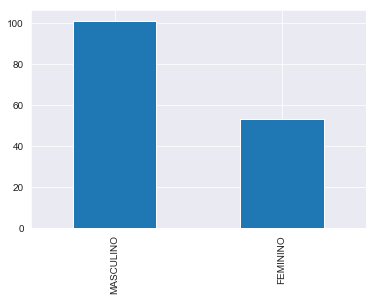

In [334]:
cand_ibi['sexo'].value_counts().plot(kind='bar')

In [ ]:
sns.countplot(x=)

#### Grau de Instrucao

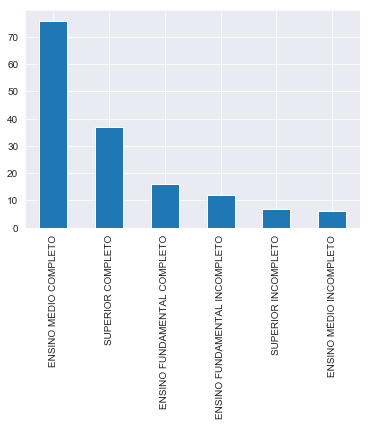

In [337]:
cand_ibi['grau_instrucao'].value_counts().plot(kind='bar')

In [ ]:
sns.countplot(x=cand_ibi['grau_instrucao'], data=cand_ibi, hue=cand_ibi['idade_na_posse'])
plt.xticks(rotation=90)

#### Cor Raca

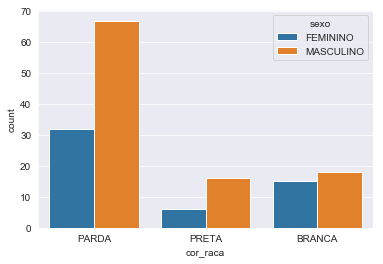

In [12]:
sns.countplot(x=cand_ibi['cor_raca'], data=cand_ibi, hue=cand_ibi['sexo'])

In [51]:
cand_ibi.groupby('sexo')['cor_raca'].value_counts()

sexo       cor_raca
FEMININO   PARDA       32
           BRANCA      15
           PRETA        6
MASCULINO  PARDA       67
           BRANCA      18
           PRETA       16
Name: cor_raca, dtype: int64

In [45]:
cand_ibi['cor_raca'].value_counts()

PARDA     99
BRANCA    33
PRETA     22
Name: cor_raca, dtype: int64

#### Ocupacao

In [13]:
cand_ibi['ocupacao'].value_counts()

OUTROS                                                                    48
COMERCIANTE                                                               19
SERVIDOR PÚBLICO MUNICIPAL                                                12
EMPRESÁRIO                                                                 8
VEREADOR                                                                   7
PROFESSOR DE ENSINO FUNDAMENTAL                                            5
SERVIDOR PÚBLICO ESTADUAL                                                  4
ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS                             4
TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO ENFERMEIRO)                   3
COMERCIÁRIO                                                                3
ADVOGADO                                                                   2
REPRESENTANTE COMERCIAL                                                    2
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                                       2

### Eleitores de Ibicarai

In [22]:
eleitores = pd.read_csv('eleitorado.csv', encoding='latin', sep=';')
ibi = eleitores[(eleitores['SG_UF'] == 'BA') & (eleitores['NM_MUNICIPIO'] == 'IBICARAÍ')]

In [23]:
ibi[ibi['DS_ESTADO_CIVIL'].isin(['VIÚVO'])]['QT_ELEITORES_PERFIL'].sum()

569

In [24]:
for x in ibi['DS_GRAU_ESCOLARIDADE'].unique():
    print(x + ':', ibi[ibi['DS_GRAU_ESCOLARIDADE'].isin([x])]['QT_ELEITORES_PERFIL'].sum())

ENSINO FUNDAMENTAL COMPLETO: 988
ENSINO MÉDIO COMPLETO: 4001
SUPERIOR INCOMPLETO: 640
ENSINO MÉDIO INCOMPLETO: 2393
ENSINO FUNDAMENTAL INCOMPLETO: 5232
SUPERIOR COMPLETO: 1466
LÊ E ESCREVE: 2108
ANALFABETO: 2365
NÃO INFORMADO: 10


In [36]:
ibi.groupby('DS_ESTADO_CIVIL')[['QT_ELEITORES_PERFIL']].sum()

,QT_ELEITORES_PERFIL
DS_ESTADO_CIVIL,
CASADO,3642
DIVORCIADO,418
NÃO INFORMADO,13
SEPARADO JUDICIALMENTE,77
SOLTEIRO,14484
VIÚVO,569


In [29]:
ibi.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'CD_MUN_SIT_BIOMETRIA', 'DS_MUN_SIT_BIOMETRIA',
       'NR_ZONA', 'CD_GENERO', 'DS_GENERO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA', 'DS_FAIXA_ETARIA',
       'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL',
       'QT_ELEITORES_BIOMETRIA', 'QT_ELEITORES_DEFICIENCIA',
       'QT_ELEITORES_INC_NM_SOCIAL'],
      dtype='object')

In [31]:
ibi

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
108561,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,1600,16 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,0,0,0
108562,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,1700,17 anos,6,ENSINO MÉDIO COMPLETO,5,4,0,0
108563,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,1800,18 anos,7,SUPERIOR INCOMPLETO,1,1,0,0
108564,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,4044,40 a 44 anos,5,ENSINO MÉDIO INCOMPLETO,55,48,0,0
108565,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,5054,50 a 54 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,149,132,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642159,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,6569,65 a 69 anos,1,ANALFABETO,3,2,0,0
642160,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,6569,65 a 69 anos,8,SUPERIOR COMPLETO,1,1,0,0
642161,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,7074,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,0,0,0
642162,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,8084,80 a 84 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,0


Text(0.5, 0, 'Faixa Etaria x Grau Escolaridade')

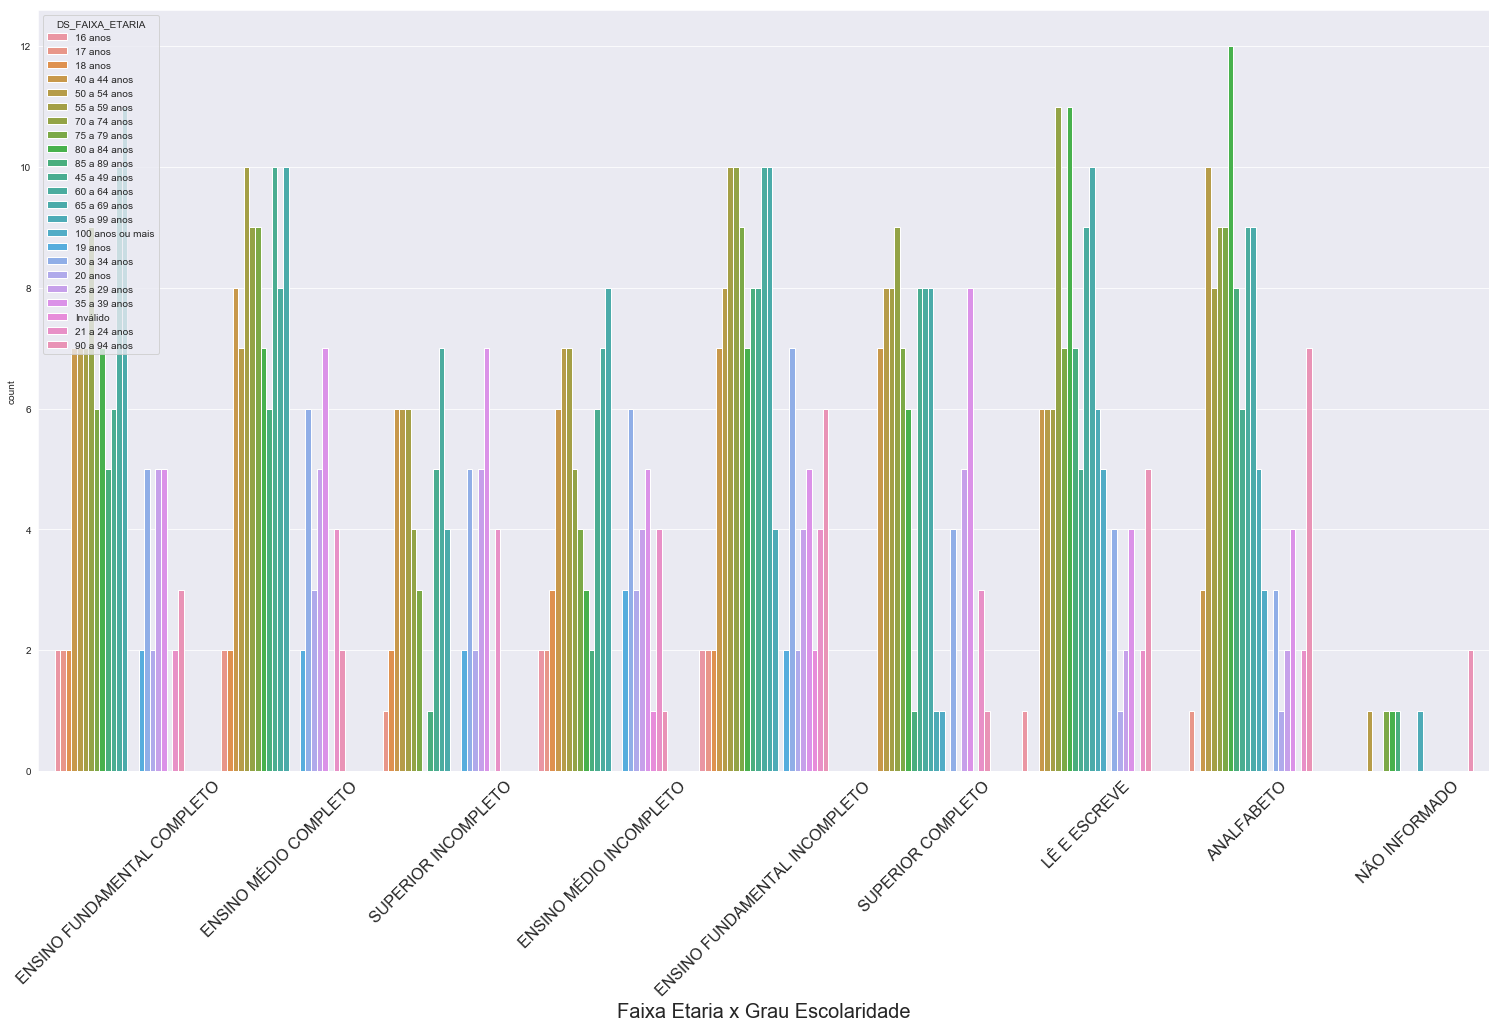

In [82]:
plt.figure(figsize=(26, 14))
sns.countplot(x=ibi['DS_GRAU_ESCOLARIDADE'], hue=ibi['DS_FAIXA_ETARIA'])
plt.xticks(rotation=45, fontsize=16)
plt.xlabel('Faixa Etaria x Grau Escolaridade', fontsize=20)
